In [42]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [43]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**CRIM**: a numeric vector of per capita crime

**ZN**: a numeric vector of proportions of residential land zoned for lots over 25000 sq. ft per town (constant for all Boston tracts)

**INDUS**: a numeric vector of proportions of non-retail business acres per town (constant for all Boston tracts)

**CHAS**: a factor with levels 1 if tract borders Charles River; 0 otherwise

**NOX**: a numeric vector of nitric oxides concentration (parts per 10 million) per town

**RM**: a numeric vector of average numbers of rooms per dwelling

**AGE**: a numeric vector of proportions of owner-occupied units built prior to 1940

**DIS**: a numeric vector of weighted distances to five Boston employment centres

**RAD**: a numeric vector of an index of accessibility to radial highways per town (constant for all Boston tracts)

**TAX**: a numeric vector full-value property-tax rate per USD 10,000 per town (constant for all Boston tracts)

**PTRATIO**: a numeric vector of pupil-teacher ratios per town (constant for all Boston tracts)

**B**: a numeric vector of 1000*(Bk - 0.63)^2 where Bk is the proportion of blacks

**LSTAT**: a numeric vector of percentage values of lower status population

**PRICE**: price of the house


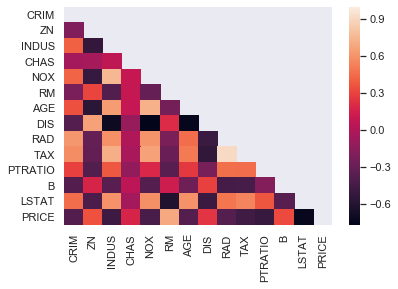

In [44]:
import seaborn as sns
matrix = np.triu(bos.corr())
ax = sns.heatmap(bos.corr(), mask=matrix)

In [78]:
from sklearn.linear_model import LinearRegression


x = bos['AGE']
y = bos['PRICE']

x_reshaped = x.values.reshape(-1, 1)

regressor = LinearRegression()  
regressor.fit(x, y) #training the algorithm
y_pred = regressor.predict(x)

fig, ax = plt.subplots()

ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Price', fontsize=10)
ax.set_title('Age vs Price')

ax.scatter(x, y, c=colors, alpha=0.3)
plt.plot(x_reshaped, y_pred, color='red')

plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 65.2  78.9  61.1  45.8  54.2  58.7  66.6  96.1 100.   85.9  94.3  82.9
  39.   61.8  84.5  56.5  29.3  81.7  36.6  69.5  98.1  89.2  91.7 100.
  94.1  85.7  90.3  88.8  94.4  87.3  94.1 100.   82.   95.   96.9  68.2
  61.4  41.5  30.2  21.8  15.8   2.9   6.6   6.5  40.   33.8  33.3  85.5
  95.3  62.   45.7  63.   21.1  21.4  47.6  21.9  35.7  40.5  29.2  47.2
  66.2  93.4  67.8  43.4  59.5  17.8  31.1  21.4  36.8  33.    6.6  17.5
   7.8   6.2   6.   45.   74.5  45.8  53.7  36.6  33.5  70.4  32.2  46.7
  48.   56.1  45.1  56.8  86.3  63.1  66.1  73.9  53.6  28.9  77.3  57.8
  69.6  76.   36.9  62.5  79.9  71.3  85.4  87.4  90.   96.7  91.9  85.2
  97.1  91.2  54.4  81.6  92.9  95.4  84.2  88.2  72.5  82.6  73.1  65.2
  69.7  84.1  92.9  97.   95.8  88.4  95.6  96.   98.8  94.7  98.9  97.7
  97.9  95.4  98.4  98.2  93.5  98.4  98.2  97.9  93.6 100.  100.  100.
  97.8 100.  100.   95.7  93.8  94.9  97.3 100.   88.   98.5  96.   82.6
  94.   97.4 100.  100.   92.6  90.8  98.2  93.9  91.8  93.   96.2  79.2
  96.1  95.2  94.6  97.3  88.5  84.1  68.7  33.1  47.2  73.4  74.4  58.4
  83.3  62.2  92.2  95.6  89.8  68.8  53.6  41.1  29.1  38.9  21.5  30.8
  26.3   9.9  18.8  32.   34.1  36.6  38.3  15.3  13.9  38.4  15.7  33.2
  31.9  22.3  52.5  72.7  59.1 100.   92.1  88.6  53.8  32.3   9.8  42.4
  56.   85.1  93.8  92.4  88.5  91.3  77.7  80.8  78.3  83.   86.5  79.9
  17.   21.4  68.1  76.9  73.3  70.4  66.5  61.5  76.5  71.6  18.5  42.2
  54.3  65.1  52.9   7.8  76.5  70.2  34.9  79.2  49.1  17.5  13.    8.9
   6.8   8.4  32.   19.1  34.2  86.9 100.  100.   81.8  89.4  91.5  94.5
  91.6  62.8  84.6  67.   52.6  61.5  42.1  16.3  58.7  51.8  32.9  42.8
  49.   27.6  32.1  32.2  64.5  37.2  49.7  24.8  20.8  31.9  31.5  31.3
  45.6  22.9  27.9  27.7  23.4  18.4  42.3  31.1  51.   58.   20.1  10.
  47.4  40.4  18.4  17.7  41.1  58.1  71.9  70.3  82.5  76.7  37.8  52.8
  90.4  82.8  87.3  77.7  83.2  71.7  67.2  58.8  52.3  54.3  49.9  74.3
  40.1  14.7  28.9  43.7  25.8  17.2  32.2  28.4  23.3  38.1  38.5  34.5
  46.3  59.6  37.3  45.4  58.5  49.3  59.7  56.4  28.1  48.5  52.3  27.7
  29.7  34.5  44.4  35.9  18.5  36.1  21.9  19.5  97.4  91.   83.4  81.3
  88.   91.1  96.2  89.   82.9  87.9  91.4 100.  100.   96.8  97.5 100.
  89.6 100.  100.   97.9  93.3  98.8  96.2 100.   91.9  99.1 100.  100.
  91.2  98.1 100.   89.5 100.   98.9  97.   82.5  97.   92.6  94.7  98.8
  96.   98.9 100.   77.8 100.  100.  100.   96.   85.4 100.  100.  100.
  97.9 100.  100.  100.  100.  100.  100.  100.   90.8  89.1 100.   76.5
 100.   95.3  87.6  85.1  70.6  95.4  59.7  78.7  78.1  95.6  86.1  94.3
  74.8  87.9  95.   94.6  93.3 100.   87.9  93.9  92.4  97.2 100.  100.
  96.6  94.8  96.4  96.6  98.7  98.3  92.6  98.2  91.8  99.3  94.1  86.5
  87.9  80.3  83.7  84.4  90.   88.4  83.   89.9  65.4  48.2  84.7  94.5
  71.   56.7  84.   90.7  75.   67.6  95.4  97.4  93.6  97.3  96.7  88.
  64.7  74.9  77.   40.3  41.9  51.9  79.8  53.2  92.7  98.3  98.   98.8
  83.5  54.   42.6  28.8  72.9  70.6  65.3  73.5  79.7  69.1  76.7  91.
  89.3  80.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Generally as the age of the house goes up, the price goes down

In [9]:
from sklearn.model_selection import train_test_split

#Getting train and test data
X = bos[bos.columns]
Y = bos['PRICE']
#Randomly sampling 75% of the data and 25% for tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)